In [ ]:
from fastai.tabular import *
from fastai.vision import *
import warnings; warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = r"/gdrive/My Drive/Breast_Cancer_Prediction/"

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Benign', 'Malignant'], 2, 6275, 1568)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.573525,0.300634,0.892219,27:02
1,0.341716,0.210925,0.915179,04:01
2,0.274638,0.226206,0.906888,04:01
3,0.227759,0.131876,0.956633,03:58
4,0.181720,0.121474,0.951531,04:02
5,0.142721,0.098383,0.964286,04:04
6,0.122370,0.089232,0.968750,04:03
7,0.115325,0.081915,0.971301,04:03
8,0.103877,0.078834,0.973214,04:05
9,0.099957,0.077190,0.972577,04:03


In [ ]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


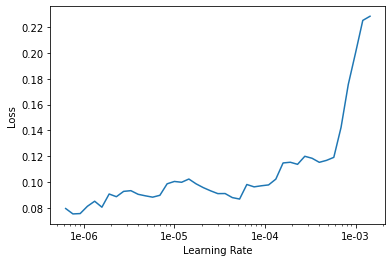

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-07, 1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.086216,0.082793,0.967474,04:08
1,0.080785,0.067817,0.971939,04:10
2,0.077831,0.065890,0.977041,04:10
3,0.061584,0.062032,0.978316,04:08
4,0.061865,0.062215,0.975765,04:06
5,0.058134,0.062806,0.976403,04:07
6,0.060141,0.057794,0.977041,04:09
7,0.063789,0.056356,0.977041,04:10
8,0.055149,0.055940,0.978316,04:10
9,0.060510,0.057542,0.978316,04:10


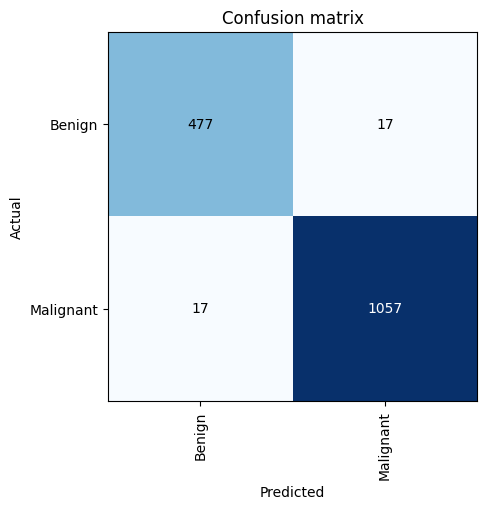

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
learn.save('/gdrive/My Drive/FastaiRESNETmodel_BreastCancerPrediction')